# Transactions Fraud Detection

**Authors:** [Peter Macinec](https://github.com/pmacinec), [Timotej Zatko](https://github.com/timzatko)

## Baseline model and feature selection

At this jupyter notebook, baseline model will be trained on both, original data and balanced data. Also, *Recursive Feature Elimination with Cross-Validation (RFECV)* will be used for feature selection.

This setup will be then used to compare the results and performance of nature inspired algorithms used for feature selection.

### Setup and reading the data

At first, we need to import libraries and set initial configs.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

from src.dataset import load_processed_data
from src.data_balancing import random_undersample
from src.evaluation import custom_classification_report

In [3]:
x_train, y_train, x_test, y_test = load_processed_data()

Number of records:
  x_train - 472432
  y_train - 472432
  x_test - 118108
  y_test - 118108


Data will be balanced using random undersampling method:

In [4]:
%%time
x_train_undersampled, y_train_undersampled = random_undersample(x_train, y_train)
len(x_train_undersampled), len(y_train_undersampled)

CPU times: user 1.19 s, sys: 136 ms, total: 1.32 s
Wall time: 1.32 s


(32842, 32842)

### Baseline model

#### Original data

In [5]:
%%time

clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(x_train, y_train)

CPU times: user 3min 9s, sys: 244 ms, total: 3min 9s
Wall time: 3min 9s


not fraud
precision: 0.9813640595085451
recall: 0.9838871572719108
f1-score: 0.9826239887442841
support: 113574


is fraud
precision: 0.5685997171145686
recall: 0.5319805910895457
f1-score: 0.5496809480401095
support: 4534


accuracy: 0.9665390998069563


macro avg
precision: 0.7749818883115569
recall: 0.7579338741807282
f1-score: 0.7661524683921968
support: 118108


weighted avg
precision: 0.9655186169609251
recall: 0.9665390998069563
f1-score: 0.9660039143500624
support: 118108


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Score: 0.7749818883115568




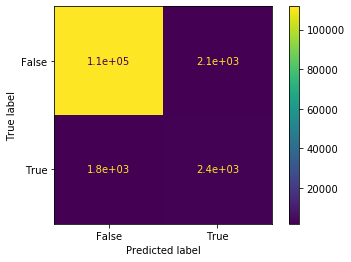

In [6]:
custom_classification_report(clf, x_test, y_test)

#### Balanced data - undersampling

In [7]:
%%time
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(x_train_undersampled, y_train_undersampled)

CPU times: user 3.1 s, sys: 4 ms, total: 3.1 s
Wall time: 3.1 s


not fraud
precision: 0.7738921188063161
recall: 0.990713466597711
f1-score: 0.8689821115121393
support: 88946


is fraud
precision: 0.8052805280528053
recall: 0.1171387421987518
f1-score: 0.20452640402347025
support: 29162


accuracy: 0.7750194737020354


macro avg
precision: 0.7895863234295607
recall: 0.5539261043982314
f1-score: 0.5367542577678048
support: 118108


weighted avg
precision: 0.7816422186339833
recall: 0.7750194737020354
f1-score: 0.7049216131395942
support: 118108


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Score: 0.7895863234295607




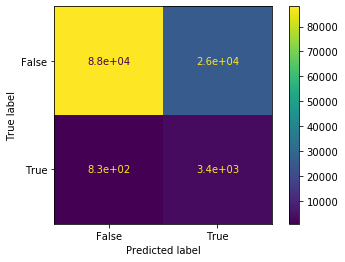

In [8]:
custom_classification_report(clf, x_test, y_test)